# **Hyper parameter tuning**

## Grid Search CV

Grid search cv tries all combinations of passed hyperparams values

In [1]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline

In [8]:
# generating the data

X,y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

print(X.shape)
print(y.shape)

(200, 1)
(200,)


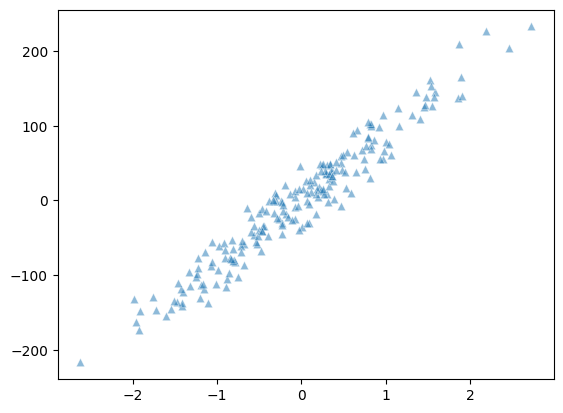

In [9]:
# visualize
sns.scatterplot(x = X.reshape(-1),y = y, marker = '^', alpha = 0.5)
plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"train size: {x_train.shape[0]}")
print(f"test size: {x_test.shape[0]}")

train size: 160
test size: 40


In [13]:
pipeline = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("ridge", Ridge())
])

In [17]:
param_grid = {
    "poly__degree":[2, 3, 4, 5],
    "ridge__alpha": [0.01, 0.1, 1, 10, 100]
}

In [18]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'poly__degree': [2, 3, 4, 5],
                         'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [19]:
print("Best params (Grid search):", grid_search.best_params_)
print("Best score (Grid search):", -grid_search.best_score_)

Best params (Grid search): {'poly__degree': 2, 'ridge__alpha': 0.01}
Best score (Grid search): 413.02919856078097


## Randomized Search cv

Tries random combinations of passed hyperparameter values and selects best one among the random selection

In [26]:
from scipy.stats import uniform, randint

param_dict = {
    "poly__degree": randint(2, 6),
    "ridge__alpha": uniform(0.01, 100)
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dict,
    n_iter= 20, # tries 20 combinations
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

In [27]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('poly',
                                              PolynomialFeatures(include_bias=False)),
                                             ('ridge', Ridge())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'poly__degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000179A80581D0>,
                                        'ridge__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000179A8059940>},
                   random_state=42, scoring='neg_mean_squared_error')

In [28]:
print("Best params (Randomized search):", random_search.best_params_)
print("Best score:", -random_search.best_score_)

Best params (Randomized search): {'poly__degree': 2, 'ridge__alpha': np.float64(4.655041271999773)}
Best score: 426.62014617054786
